<a href="https://colab.research.google.com/github/francianerod/Alerta-Raios/blob/main/3_Alerta_Raios_Starnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Empresa:** EPL Informática Ltda

**Área/Setor:** Operacional/Pesquisa e Desenvolvimento

**Motivo do código:** Caracterização do Campo Elétrico no Vale do Paraíba - SP

**Parte 3:** Seleção e distância dos dados STARNET e união com dados Field Mill

## **1) Pacotes e tratamento dos dados**

In [1]:
# Comando de abertura para Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
"""
# Instalando pacotes necessários para execução da visualização
# Ao baixar os pacotes uma única vez, desligar o comando da célula.

!pip install cartopy
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical
!python cartopy_feature_download.py cultural

# Instalando o proplot
!pip install proplot==0.6.4

# Para cálculo da distância entre dois pontos
!pip install geopy
"""

'\n# Instalando pacotes necessários para execução da visualização\n# Ao baixar os pacotes uma única vez, desligar o comando da célula.\n\n!pip install cartopy\n!pip uninstall -y shapely \n!pip install shapely --no-binary shapely\n!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py\n!python cartopy_feature_download.py physical\n!python cartopy_feature_download.py cultural\n\n# Instalando o proplot\n!pip install proplot==0.6.4\n\n# Para cálculo da distância entre dois pontos\n!pip install geopy\n'

In [3]:
#Importação de Pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import datetime
from geopy.distance import geodesic
from numpy import cos, sin, arcsin, sqrt
from math import radians

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.


In [4]:
#Função leitura de data e hora
dateparse = lambda x: datetime.strptime(x, '%Y %m %d %H %M %S')

In [5]:
# Organização dos dados
starnet_base1 = pd.read_csv('/content/drive/MyDrive/Alerta_Raios_Análise/starnet_dados/Agrupamento/2011-12-07.dat', 
                            sep='\s+', 
                            header=None,
                            parse_dates={ 'datahora': [0, 1, 2, 3, 4, 5]},
                            date_parser=dateparse
                            )

# Retirada de colunas
starnet_base2 = starnet_base1.drop(starnet_base1.columns[[4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]], axis=1)

# separando dia e hora
starnet_base2['datahora'] = pd.to_datetime(starnet_base2['datahora'])
starnet_base2['Data'] = starnet_base2['datahora'].dt.strftime('%Y-%m-%d')
starnet_base2['Hora'] = starnet_base2['datahora'].dt.strftime('%H:%M:%S')

# Apagando coluna 
del starnet_base2['datahora']

# Organizando e renomeando colunas
starnet_base2 = starnet_base2[['Data', 'Hora', 6,7,8,11]]
starnet_base2.rename(columns = {6: 'milissegundo', 7: 'latitude', 8: 'longitude', 11: 'qualidade'}, inplace=True)
#starnet_base2

# **2) Filtragem de Dados**

In [6]:
# Filtagem 1: Critério Horário
starnet_filtrado1 = (starnet_base2['Hora'] >= '19:20:00') & (starnet_base2['Hora'] <= '20:20:00')
selecao1 = starnet_base2[starnet_filtrado1]

# Filtragem 2: Critério Latitude
selecao2 = (selecao1 [ (selecao1.latitude <= -19.) & (selecao1.latitude >= -26.)])

# Filtragem 2: Critério Longitude
selecao3 = (selecao2 [ (selecao2.longitude <= -40.) & (selecao2.longitude >= -54.)])

# Filtragem 4: Critério Qualidade
starnet_final = (selecao3[(selecao3.qualidade == 0)])
#starnet_final

# **3) Localização dos sensores**

In [7]:
# Localização dos sensores em solo

lat_radar_sjc = -23.208702
lon_radar_sjc = -45.952187

lat_sensor_aer= -23.224739
lon_sensor_aer= -45.862521

lat_sensor_bin= -23.209431
lon_sensor_bin= -45.880862

lat_sensor_peq= -23.201461
lon_sensor_peq= -45.873773

lat_sensor_met = -23.211283
lon_sensor_met = -45.860278

lat_sensor_ieav = -23.251728
lon_sensor_ieav = -45.857773

In [8]:
#Cálculo da Distância entre os sensores em relação ao radar

radar = (lat_radar_sjc, lon_radar_sjc)
sensor1 = (lat_sensor_aer, lon_sensor_aer)
sensor2 = (lat_sensor_bin, lon_sensor_bin)
sensor3 = (lat_sensor_peq, lon_sensor_peq)
sensor4 = (lat_sensor_met, lon_sensor_met)
sensor5 = (lat_sensor_ieav, lon_sensor_ieav)

print("A distância entre o RADAR e o sensor AEROPORTO é de:", geodesic(radar, sensor1).m, "metros")
print("A distância entre o RADAR e o sensor BINFA é de:", geodesic(radar, sensor2).m, "metros")
print("A distância entre o RADAR e o sensor PEQ é de:", geodesic(radar, sensor3).m, "metros")
print("A distância entre o RADAR e o sensor MET é de:", geodesic(radar, sensor4).m, "metros")
print("A distância entre o RADAR e o sensor IEAV é de:", geodesic(radar, sensor5).m, "metros")

A distância entre o RADAR e o sensor AEROPORTO é de: 9348.307255299283 metros
A distância entre o RADAR e o sensor BINFA é de: 7301.55598218819 metros
A distância entre o RADAR e o sensor PEQ é de: 8066.963109718578 metros
A distância entre o RADAR e o sensor MET é de: 9412.445704836744 metros
A distância entre o RADAR e o sensor IEAV é de: 10774.053631319592 metros


In [9]:

# Cálculo da média de lat e lon de sensores de Field Mill
# Há necessidade de fazer trocas se utilizar 4 ou 5 sensores durante o cálculo

lat_result_5 = (lat_sensor_aer + lat_sensor_bin + lat_sensor_met + lat_sensor_peq + lat_sensor_ieav)/5.0
lon_result_5 = (lon_sensor_aer + lon_sensor_bin + lon_sensor_met + lon_sensor_peq + lon_sensor_ieav)/5.0

print(lat_result_5)
print(lon_result_5)


-23.2197284
-45.8670414


In [10]:
#Utilize essa linha de código ao usar um unico sensor ou substitua pela média de sensores

lat_result = -23.251728
lon_result = -45.857773

In [11]:

# Distância do radar para agrumento de sensores Field Mill
radar = (lat_radar_sjc, lon_radar_sjc)
agrupamento = (lat_result, lon_result)
print("A distância entre o(s) sensor(es) em relação ao radar é de:", geodesic(radar, agrupamento).m, "metros")


A distância entre o(s) sensor(es) em relação ao radar é de: 10774.053631319592 metros


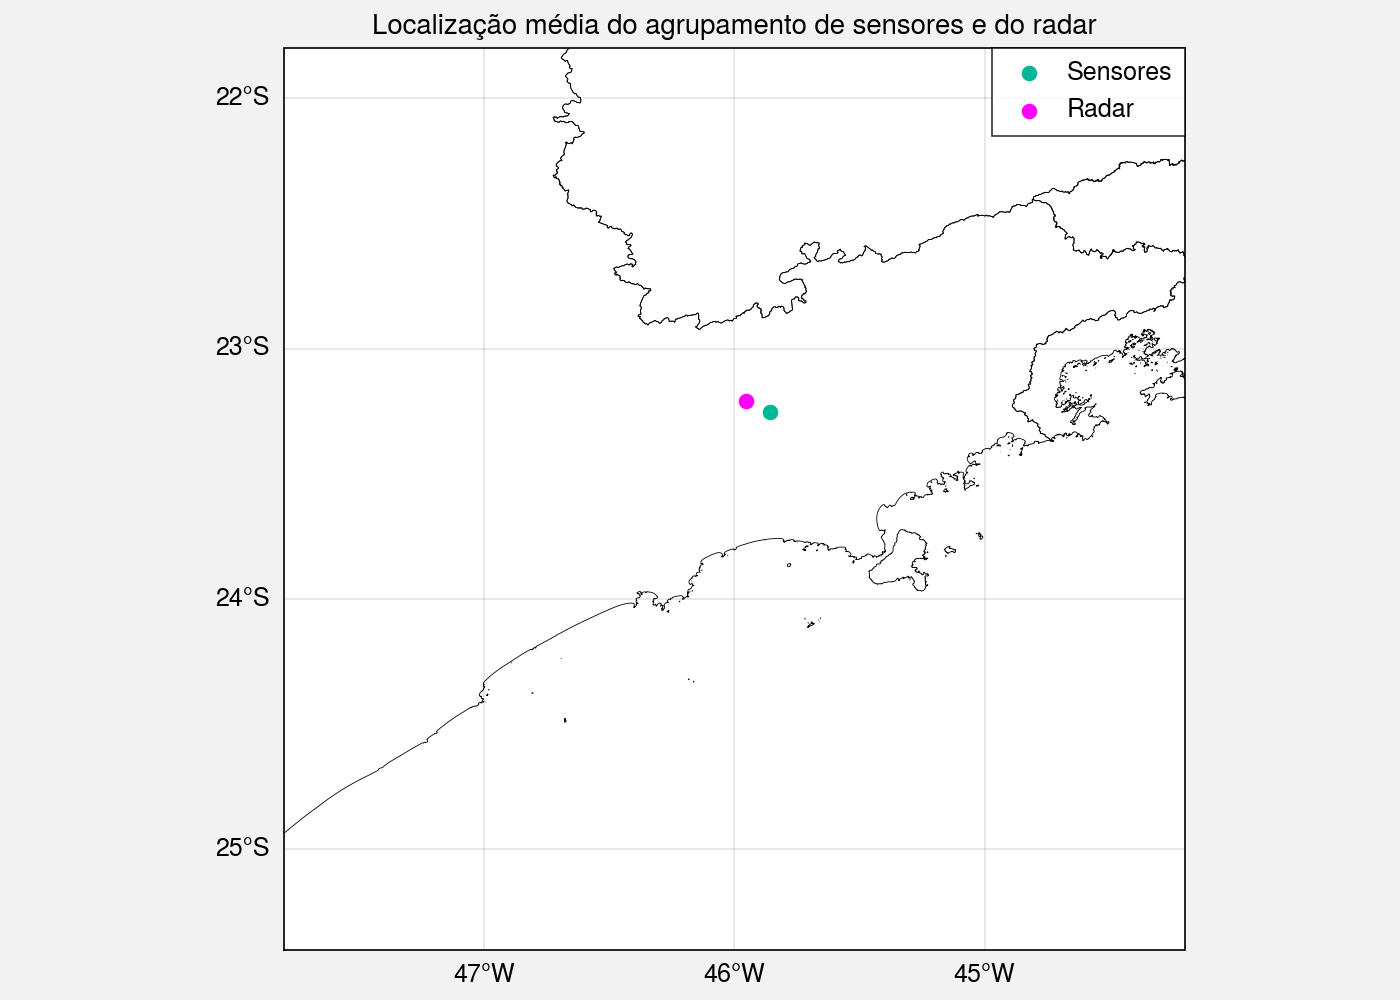

In [12]:
#Localização dos dois pontos no mapa
fig, ax = plot.subplots(figsize=(7, 5),
                        tight=True, 
                        proj='pcarree')

ax.format(coast=False, borders=True, innerborders=False, labels=True, latlines=1, lonlines=1, 
          latlim=(-21.8, -25.4), lonlim=(-47.8, -44.2), 
          title='Localização média do agrupamento de sensores e do radar')

# Adiciona shapeFile dos Estados
shapefile = list(shpreader.Reader('/content/drive/MyDrive/Alerta_Raios_Análise/shape_map/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Plota a localização dos sensores
ax.scatter(lon_result, lat_result, transform=ccrs.PlateCarree(), marker='o', s=25, color='#00B796', label='Sensores')
ax.scatter(lon_radar_sjc, lat_radar_sjc, transform=ccrs.PlateCarree(), marker='o', s=25, color='magenta', label='Radar')

# Adiciona legenda
ax.legend(ncol=1)

# Ajuste e gerar imagem
plt.tight_layout()
plt.show()

#Salva figura
#fig.save('regiao_estudo_ATUAL.png', bbox_inches='tight')

## **4) Cálculos de distância incluídas no DataFrame**

In [13]:
# Fórmula Haversine vetorizada com dataframe de Pandas
# Utilize valores médios de localização calculada na etapa acima
# Ao utilizar um único sensor, informe a localização dele em lon1 e lat1 

def haversine(row):
    lon1 = -45.857773
    lat1 = -23.251728
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c

    return km

In [14]:
# Cálculo da distância entre o ponto médio do Field Mill com raios STARNET
starnet_final['distancia_km'] = starnet_final.apply(lambda row: haversine(row), axis=1)
starnet_final.head()

,Data,Hora,milissegundo,latitude,longitude,qualidade,distancia_km
163058,2011-12-07,19:20:20,898291,-20.30421,-40.95637,0,602.501771
163076,2011-12-07,19:20:22,525304,-22.72881,-47.12897,0,142.433271
163086,2011-12-07,19:20:23,767732,-20.02535,-52.09980,0,737.595785
163116,2011-12-07,19:20:28,557069,-20.42866,-52.08926,0,715.117003
163180,2011-12-07,19:20:36,699434,-19.90120,-53.88342,0,908.856570


In [15]:
# Filtragem 5: Critério distância
starnet_dist = (starnet_final[(starnet_final.distancia_km <= 25.)])
starnet_dist

,Data,Hora,milissegundo,latitude,longitude,qualidade,distancia_km
178457,2011-12-07,19:55:55,675420,-23.12916,-45.77443,0,16.062037
178459,2011-12-07,19:55:55,807139,-23.11818,-45.76325,0,17.705128
178461,2011-12-07,19:55:56,31861,-23.09335,-45.80410,0,18.434149
179061,2011-12-07,19:57:23,752034,-23.04701,-45.87222,0,22.797153
179215,2011-12-07,19:57:43,853195,-23.10859,-45.81776,0,16.423022
179626,2011-12-07,19:58:44,233650,-23.04023,-45.85334,0,23.507104
180744,2011-12-07,20:01:16,702520,-23.11807,-45.95510,0,17.873106
180928,2011-12-07,20:01:43,80932,-23.09471,-45.82234,0,17.820163
180929,2011-12-07,20:01:43,133961,-23.10787,-45.83040,0,16.228953
181624,2011-12-07,20:03:15,470243,-23.07984,-45.84474,0,19.147427


In [16]:
# Tabela de Frequência
contagem_filtro5 = starnet_dist["distancia_km"].value_counts()
contagem_filtro5 = pd.DataFrame(contagem_filtro5)
contagem_filtro5

,distancia_km
17.820163,1
16.423022,1
13.848083,1
17.873106,1
16.062037,1
22.797153,1
17.705128,1
23.507104,1
16.228953,1
19.147427,1


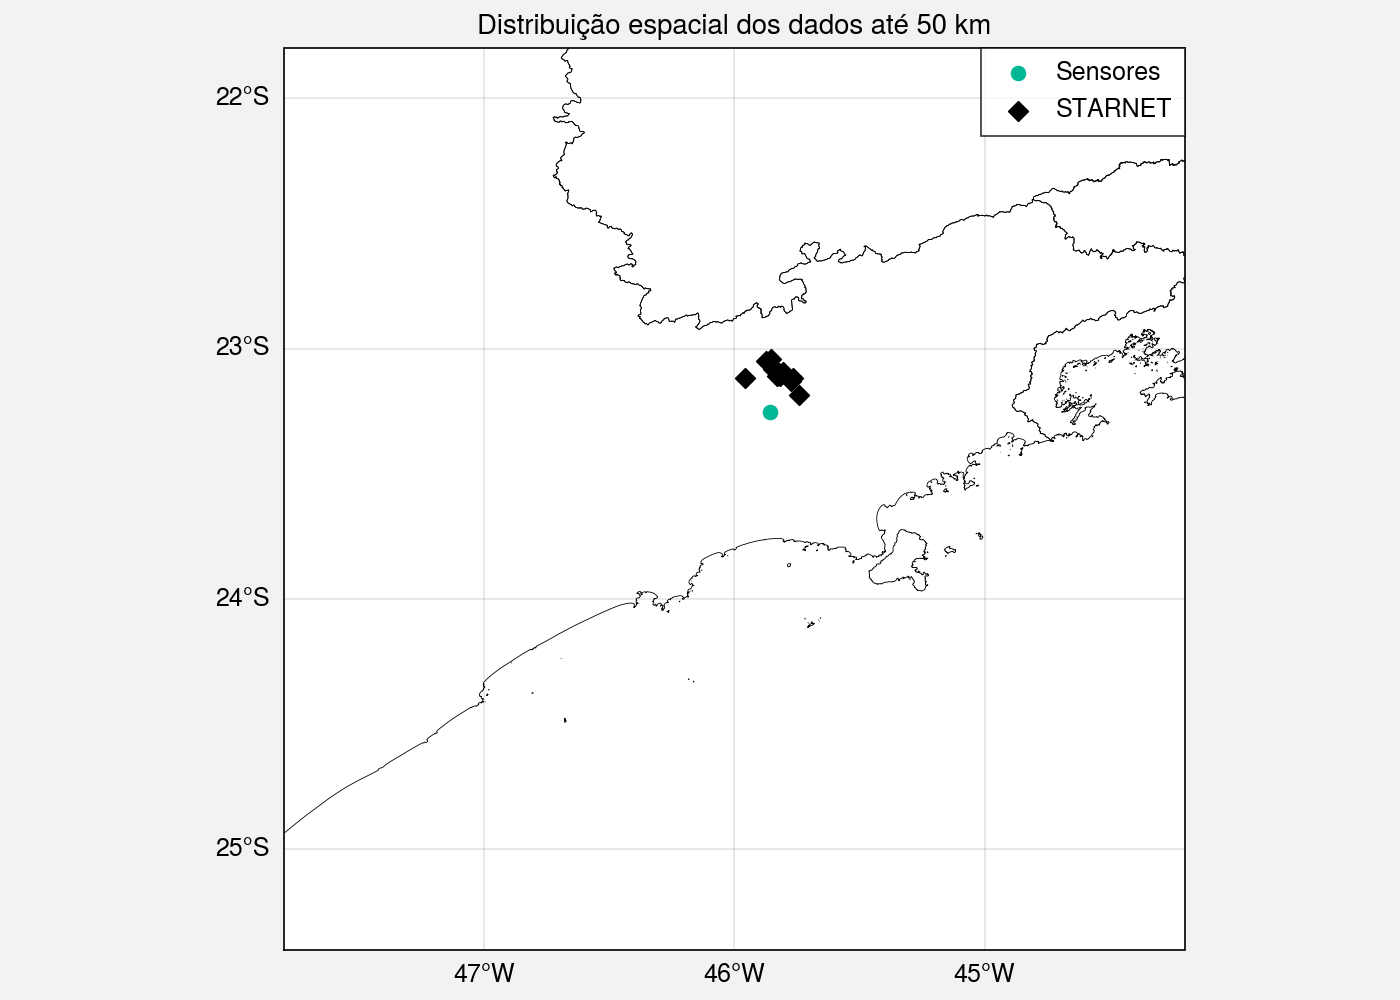

In [17]:
#Localização dos dois pontos no mapa
fig, ax = plot.subplots(figsize=(7, 5),
                        tight=True, 
                        proj='pcarree')

ax.format(coast=False, borders=True, innerborders=False, labels=True, latlines=1, lonlines=1, 
          latlim=(-21.8, -25.4), lonlim=(-47.8, -44.2), 
          title='Distribuição espacial dos dados até 50 km')

# Adiciona shapeFile dos Estados
shapefile = list(shpreader.Reader('/content/drive/MyDrive/Alerta_Raios_Análise/shape_map/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Plota a localização dos sensores
ax.scatter(lon_result, lat_result, transform=ccrs.PlateCarree(), marker='o', s=25, color='#00B796', label='Sensores')

# Plota localização do sinal STARNET
ax.scatter(starnet_dist['longitude'], starnet_dist['latitude'], transform=ccrs.PlateCarree(), marker='D', s=25, color='black', label='STARNET')

# Adiciona legenda
ax.legend(ncol=1)

# Ajuste e gerar imagem
plt.tight_layout()
plt.show()

#Salva figura
#fig.save('regiao_estudo_ATUAL.png', bbox_inches='tight')

## **5) União dos dados do Field Mill e da STARNET**

In [18]:
starnet_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 178457 to 184691
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          11 non-null     object 
 1   Hora          11 non-null     object 
 2   milissegundo  11 non-null     int64  
 3   latitude      11 non-null     float64
 4   longitude     11 non-null     float64
 5   qualidade     11 non-null     int64  
 6   distancia_km  11 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 704.0+ bytes


In [19]:
# Abrir e retirada de colunas dos dados STARNET
starnet_dist = starnet_dist.drop(starnet_dist.columns[[2,5]], axis=1)
starnet_dist

,Data,Hora,latitude,longitude,distancia_km
178457,2011-12-07,19:55:55,-23.12916,-45.77443,16.062037
178459,2011-12-07,19:55:55,-23.11818,-45.76325,17.705128
178461,2011-12-07,19:55:56,-23.09335,-45.80410,18.434149
179061,2011-12-07,19:57:23,-23.04701,-45.87222,22.797153
179215,2011-12-07,19:57:43,-23.10859,-45.81776,16.423022
179626,2011-12-07,19:58:44,-23.04023,-45.85334,23.507104
180744,2011-12-07,20:01:16,-23.11807,-45.95510,17.873106
180928,2011-12-07,20:01:43,-23.09471,-45.82234,17.820163
180929,2011-12-07,20:01:43,-23.10787,-45.83040,16.228953
181624,2011-12-07,20:03:15,-23.07984,-45.84474,19.147427


In [20]:
# Abrir dados do Field Mill
field_mill = pd.read_csv('/content/drive/MyDrive/Alerta_Raios_Análise/chuva_dados/3_dados_separados/aeroporto/aeroporto20111207.txt', 
                    sep='\s+', 
                    header=None,
                    parse_dates={ 'datahora': [0, 1, 2, 3, 4, 5]},
                    date_parser=dateparse,
                    names=['ano', 'mes', 'dia', 'hora', 'm', 's', 'E'])

# separando dia e hora dos dados Field Mill
field_mill['datahora'] = pd.to_datetime(field_mill['datahora'])
field_mill['Data'] = field_mill['datahora'].dt.strftime('%Y-%m-%d')
field_mill['Hora'] = field_mill['datahora'].dt.strftime('%H:%M:%S')

# Apagando coluna 
del field_mill['datahora']

# Trocando e organizando as colunas dentro do DataFrame
field_mill = field_mill[['Data','Hora','E']]
field_mill

,Data,Hora,E
0,2011-12-07,00:00:01,-2.74
1,2011-12-07,00:00:02,-2.74
2,2011-12-07,00:00:03,-2.74
3,2011-12-07,00:00:04,-2.74
4,2011-12-07,00:00:05,-2.74
...,...,...,...
86394,2011-12-07,23:59:55,1.09
86395,2011-12-07,23:59:56,1.09
86396,2011-12-07,23:59:57,1.09
86397,2011-12-07,23:59:58,1.09


In [21]:
# União dos dois dataframe com valor do campo elétrico
uniao_oficial = starnet_dist.merge(field_mill, on = "Hora", how = "left")
uniao_oficial

,Data_x,Hora,latitude,longitude,distancia_km,Data_y,E
0,2011-12-07,19:55:55,-23.12916,-45.77443,16.062037,2011-12-07,-74.24
1,2011-12-07,19:55:55,-23.11818,-45.76325,17.705128,2011-12-07,-74.24
2,2011-12-07,19:55:56,-23.09335,-45.80410,18.434149,2011-12-07,-74.24
3,2011-12-07,19:57:23,-23.04701,-45.87222,22.797153,2011-12-07,-46.24
4,2011-12-07,19:57:43,-23.10859,-45.81776,16.423022,2011-12-07,-59.02
5,2011-12-07,19:58:44,-23.04023,-45.85334,23.507104,2011-12-07,-74.24
6,2011-12-07,20:01:16,-23.11807,-45.95510,17.873106,2011-12-07,-59.02
7,2011-12-07,20:01:43,-23.09471,-45.82234,17.820163,2011-12-07,-68.76
8,2011-12-07,20:01:43,-23.10787,-45.83040,16.228953,2011-12-07,-68.76
9,2011-12-07,20:03:15,-23.07984,-45.84474,19.147427,2011-12-07,-74.24


In [22]:
# Convertendo a base de dados para csv, em caso necessário
uniao_oficial.to_csv("uniao_oficial.csv", index=False)